A backtest is like a ladder with __fixed steps__, following a __sequential__, __historical__ path to show __deterministic__ results. In contrast, Monte Carlo simulation randomly rearranges these steps, creating multiple scenarios to provide a __probabilistic__ view of possible outcomes, highlighting the difference between a single path (backtest) and multiple potential paths (Monte Carlo).

### Steps of Monte Carlo Simulation

1. **Problem Modelling**: Identify a real-world problem or system with uncertainty and variability. For example, in finance, 1) model the Maximum Sharpe Ratio of a Portfolio, based on ‘random’ security weights 2. determine the probability of outcomes — % Risk of Ruin with a portfolio, given its return characteristics (Mean, Std), and initial balance 3. VaR and CVaR (Conditional Value at Risk) are derived at their core from Monte Carlo Simulations.

2. **Random Sampling**: Generate numerous possible scenarios or inputs using random sampling based on known probability distributions to account for the system's uncertainty. 
    - Parameter Variability: In many trading scenarios, parameters like asset returns, volatilities, interest rates, or economic indicators are uncertain and subject to change. Random sampling allows us to generate multiple sets of these parameters, each representing a different possible state of the market.

3. **Simulation**: Apply system rules, equations, or algorithms to each set of random inputs to calculate the outcome or result of interest (e.g., portfolio returns, risk metrics) for each scenario. Repeat this process thousands or millions of times. Random values are drawn for the parameters in each iteration to create a diverse set of scenarios. These random scenarios simulate the possible future states of the market.

4. **Statistical Analysis**: Analyze the simulated results to understand the distribution of possible outcomes, calculate probabilities, and identify potential risks or opportunities.

Monte Carlo Simulation is useful for complex problems with inherent randomness where deterministic modelling is impractical.

# Step 1: Define the Problem
Estimate the potential risk associated with a portfolio over the next year, considering various market scenarios.

# Step 2: Data Collection
Gather historical daily returns of the securities in your portfolio. Ensure that the data includes a sufficient time frame to capture different market conditions. Use log-returns for more accurate modelling.

# Step 3: Monte Carlo Simulations

1. Initialize arrays for performance metrics (returns, volatility, Sharpe ratio).
2. Set up a loop for simulations, starting with a reasonable number of runs (e.g., 1,000).
3. __Randomly assign weights to each asset in each run to ensure unique asset allocations.__
4. Calculate and store the portfolio's return, volatility, and Sharpe ratio for each run.

# Step 4: Analysing Results
Once the simulations are complete, we have a wealth of data. Run an argmax() function on the the metric we want to optimize -- Sharpe ratio in this case. This returns the set of weights that generated the highest Sharpe ratio.

# Step 5: Decision-Making
Insight: the asset allocation that returns the best risk-adjusted return can be considered the ideal portfolio mix.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
from dateutil.relativedelta import relativedelta

# Define assets and their expected returns and standard deviations
np.random.seed(0)

assets = ['SE', 'JNJ', 'MS']
num_assets = len(assets)

today = datetime.today()
start_date = today - relativedelta(years=5)

# Download historical data
data = yf.download(assets, start=start_date, end=today)['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate expected return and standard deviation
expected_returns = returns.mean() * 252  # Annualized expected return
std_deviations = returns.std() * np.sqrt(252)  # Annualized standard deviation

# Round and reassign the variables
expected_returns = [round(ret, 2) for ret in expected_returns.values]
std_deviations = [round(std, 2) for std in std_deviations.values]

[*********************100%%**********************]  3 of 3 completed


In [2]:
expected_returns, std_deviations

([0.07, 0.27, 0.38], [0.2, 0.35, 0.68])

In [3]:
# Number of Monte Carlo simulations
num_simulations = 1000

In [4]:
# Initialise arrays to save simulation results
simulation_results = np.zeros((num_simulations, num_assets))
portfolio_returns = np.zeros(num_simulations)
portfolio_volatility = np.zeros(num_simulations)
sharpe_arr = np.zeros(num_simulations)

risk_free_rate = 0.05

# Monte Carlo simulation
for i in range(num_simulations):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    # Calculate portfolio return
    portfolio_return = np.sum(weights * expected_returns)
    
    # Calculate portfolio volatility (standard deviation)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(np.diag(std_deviations) ** 2, weights)))
    
    # Save the results
    simulation_results[i, :] = weights
    portfolio_returns[i] = portfolio_return
    portfolio_volatility[i] = portfolio_std_dev
    sharpe_arr[i] = (portfolio_return - risk_free_rate) / portfolio_std_dev

In [5]:
# Create a DataFrame from simulation results
portfolio_df = pd.DataFrame({'Return': portfolio_returns, 'Volatility': portfolio_volatility})

# Find the index of the maximum Sharpe ratio
max_sr_idx = sharpe_arr.argmax()

# Retrieve the optimal weights and corresponding return and volatility
optimal_weights = simulation_results[max_sr_idx]
optimal_return = portfolio_returns[max_sr_idx]
optimal_volatility = portfolio_volatility[max_sr_idx]

# Calculate the Sharpe ratio at the maximum point
MC_SR = sharpe_arr[max_sr_idx]

# Calculate the annualized Sharpe ratio
SR_annualized = MC_SR * np.sqrt(12) # Assuming monthly data, annualize by sqrt(12)

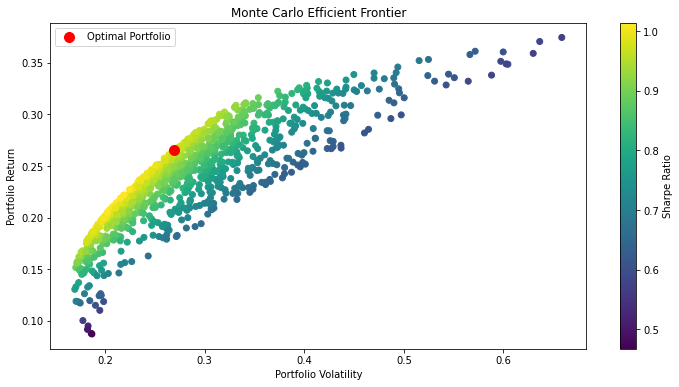

In [6]:
# Plot the Monte Carlo efficient frontier
plt.figure(figsize=(12, 6))
plt.scatter(portfolio_df['Volatility'], portfolio_df['Return'], c=portfolio_df['Return'] / portfolio_df['Volatility'], marker='o')
plt.title('Monte Carlo Efficient Frontier')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')
plt.colorbar(label='Sharpe Ratio')

# Add a red dot for the optimal portfolio
plt.scatter(optimal_volatility, optimal_return, color='red', marker='o', s=100, label='Optimal Portfolio')

# Show legend
plt.legend()
plt.show()

In [7]:
# Calculate the Sharpe ratio for each portfolio
sharpe_arr = (portfolio_returns - risk_free_rate) / portfolio_volatility

# Find the index of the maximum Sharpe ratio
max_sr_idx = sharpe_arr.argmax()

# Retrieve the optimal weights and corresponding return and volatility
optimal_weights = simulation_results[max_sr_idx]
optimal_return = portfolio_returns[max_sr_idx]
optimal_volatility = portfolio_volatility[max_sr_idx]

# Calculate the Sharpe ratio at the maximum point
MC_SR = sharpe_arr[max_sr_idx]

# Calculate the annualized Sharpe ratio
SR_annualized = MC_SR * np.sqrt(12) # Assuming monthly data, annualize by sqrt(12)

print("Optimal Portfolio Weights:", optimal_weights)
print("Optimal Portfolio Return:", optimal_return)
print("Optimal Portfolio Volatility:", optimal_volatility)
print("Max Sharpe Ratio:", MC_SR)
print("Max Annualized Sharpe Ratio:", SR_annualized)

Optimal Portfolio Weights: [0.16074071 0.58826916 0.25099013]
Optimal Portfolio Return: 0.2654607719303506
Optimal Portfolio Volatility: 0.2693609070070831
Max Sharpe Ratio: 0.7998962222260593
Max Annualized Sharpe Ratio: 2.7709217953558802


In [8]:
portfolio_returns.mean()

0.24102891890477232

# Forecast
Use Portfolio characteristics to predict expected returns, variance, and worst-case scenarios.

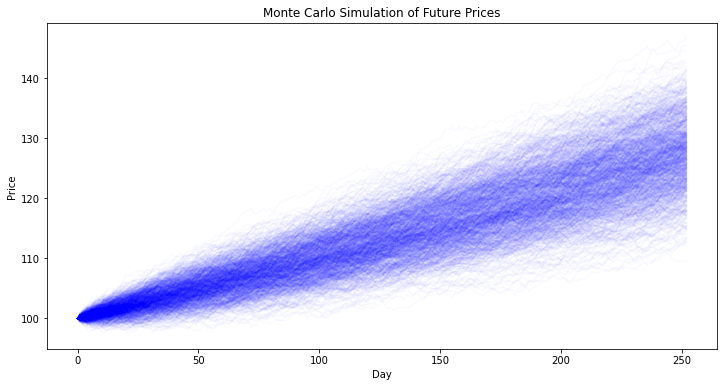

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Define variables
S = 100                         # Initial investment
T = 252                         # Time period (e.g., number of trading days in a year)
mu = portfolio_returns.mean()   # Mean return
vol = portfolio_returns.std()   # Volatility
desired_return = 0.25           # Desired return

result = []

plt.figure(figsize=(12, 6))
for i in range(num_simulations):
    # Random Sample Generation: Using statistical models to generate random daily returns
    daily_returns = np.random.lognormal(mu/T, vol/math.sqrt(T), T)

    price_list = [S]

    # Price Simulation: Repeatedly calculating future price paths by applying the randomly generated returns to the current price.
    for x in daily_returns:
        price_list.append(price_list[-1] * x)
    result.append(price_list[-1])  # Appending each run's end value
    
    plt.plot(price_list, color="blue", alpha=0.025)  # Plotting each run
    
# Calculate the final investment values
final_investment_values = result
final_investment_values = np.array(final_investment_values)

plt.title("Monte Carlo Simulation of Future Prices")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()

In [10]:
confidence_level = 0.95
sorted_returns = np.sort(final_investment_values)
index_at_var = int((1-confidence_level) * num_simulations)
var = S - sorted_returns[index_at_var]
conditional_var = S - sorted_returns[:index_at_var].mean()

# Based on past performance and given current conditions, there’s a 95% chance that 
# the investment will not lose more than $-17.73 over the specified time period.
print(f"Value at Risk (95% confidence): ${var:,.2f}")

# If things do go worse than we expected and we’re in that unlucky 5%, 
# on average, we might expect to lose about $-15.26.
print(f"Expected Tail Loss (Conditional VaR): ${conditional_var:,.2f}")

Value at Risk (95% confidence): $-17.75
Expected Tail Loss (Conditional VaR): $-15.47


In [11]:
num_success = np.sum(final_investment_values >= S * (1 + desired_return))
probability_of_success = num_success / num_simulations

print(f"Probability of achieving at least a {desired_return*100}% return: {probability_of_success*100:.2f}%")

Probability of achieving at least a 25.0% return: 67.00%


Mean return %: 127.57909605137992
Median return %: 127.63048935891328
Min return %: 109.45245172718793
Max return %: 146.77445212410817
Standard Deviation %: 5.959254966486071


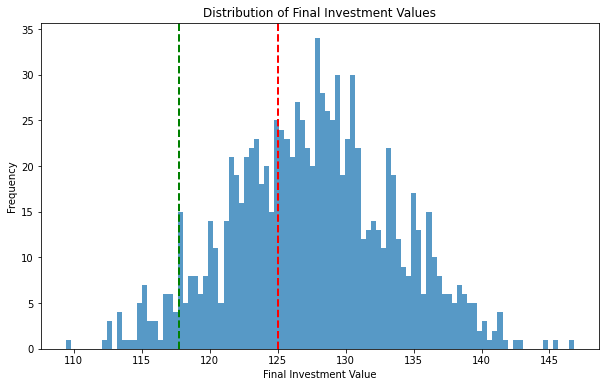

In [12]:
# Converting Results to Percentage Returns
res = [i/S*100 for i in result] 

stdev_percentage = np.std(res)

# Result Analysis: Assessing the distribution of the simulated future prices to estimate the probability of different outcomes.
print('Mean return %:',np.mean(res))
print('Median return %:',np.median(res))
print('Min return %:',np.min(res))
print('Max return %:',np.max(res))
print('Standard Deviation %:', stdev_percentage)
#print('Mode:',stats.mode(result))

plt.figure(figsize=(10, 6))
plt.hist(final_investment_values, bins=100, alpha=0.75)
plt.axvline(
      S * (1 + desired_return),
      color="r",
      linestyle="dashed",
      linewidth=2,
  )
plt.axvline(S - var, color="g", linestyle="dashed", linewidth=2)
plt.title("Distribution of Final Investment Values")
plt.xlabel("Final Investment Value")
plt.ylabel("Frequency")
plt.show()

- Red line indicates the investment value that corresponds to the desired return. It answers this question: where do I hope my investment will end up, at a minimum? Areas to the right of the red line indicate successful outcomes where my investment’s final value meets or exceeds my target return.


- Green Line marks the VaR at the specified confidence level (95%). It provides a visual cue for risk assessment -- given the risks I’m aware of, this is how much I could lose with fairly high confidence. In the context of the histogram, it gives me a sense of how much of my investment’s potential outcomes involve losing more than what I’m relatively comfortable with. The area to the left of the green line highlights the portion of outcomes where losses exceed what I would expect 95% of the time, indicating the risk of worse-than-expected outcomes.